# Chapter 9: Transformation

Load the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Transforming the Response

Read in the data:

In [2]:
savings = pd.read_csv("data/savings.csv",index_col=0)
savings.head()

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56


Fit the base model:

In [3]:
lmod = smf.ols(formula='sr ~ pop15 + pop75 + dpi + ddpi', data=savings).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           0.000790
Time:                        10:35:37   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5661      7.355      3.884      0.000      13.753      43.379
pop15         -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75         -1.6915      1.084     -1.561      0.126      -3.874       0.491
dpi           -0.0003      0.001     -0.362      0.719      -0.002       0.002
ddpi           0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Construct the Box-Cox plot:

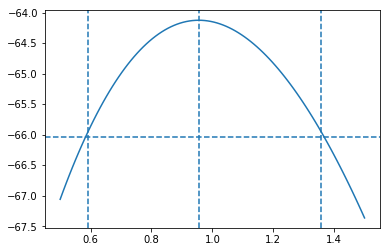

In [4]:
X = sm.add_constant(savings.iloc[:,1:])
n = savings.shape[0]
sumlogy = np.sum(np.log(savings.sr))
lam = np.linspace(0.5,1.5,100)
llk = np.empty(100)
for i in range(0, 100):
    lmod = sm.OLS(sp.stats.boxcox(savings.sr,lam[i]),X).fit()
    llk[i] = -(n/2)*np.log(lmod.ssr/n) + (lam[i]-1)*sumlogy
plt.plot(lam,llk)
maxi = llk.argmax()
plt.axvline(lam[maxi],linestyle = 'dashed')
cicut = max(llk) - sp.stats.chi2.ppf(0.95,1)/2
plt.axhline(cicut,linestyle = 'dashed')
rlam = lam[llk > cicut]
plt.axvline(rlam[0],linestyle = 'dashed')
plt.axvline(rlam[-1],linestyle = 'dashed')
plt.show()

Repeat on the Galapagos data:

In [5]:
gala = pd.read_csv("data/gala.csv", index_col = 0)
gala.drop('Endemics', axis=1, inplace=True)

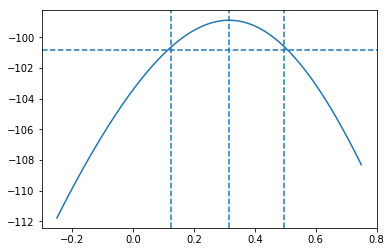

In [6]:
X = sm.add_constant(gala.iloc[:,1:])
n = gala.shape[0]
sumlogy = np.sum(np.log(gala.Species))
lam = np.linspace(-0.25,0.75,100)
llk = np.empty(100)
for i in range(0, 100):
    lmod = sm.OLS(sp.stats.boxcox(gala.Species,lam[i]),X).fit()
    llk[i] = -(n/2)*np.log(lmod.ssr/n) + (lam[i]-1)*sumlogy
plt.plot(lam,llk)
maxi = llk.argmax()
plt.axvline(lam[maxi],linestyle = 'dashed')
cicut = max(llk) - sp.stats.chi2.ppf(0.95,1)/2
plt.axhline(cicut,linestyle = 'dashed')
rlam = lam[llk > cicut]
plt.axvline(rlam[0],linestyle = 'dashed')
plt.axvline(rlam[-1],linestyle = 'dashed')
plt.show()

Consider the logtrans family of transformations:

In [7]:
leafburn = pd.read_csv("data/leafburn.csv")
leafburn.head()

,nitrogen,chlorine,potassium,burntime
0,3.05,1.45,5.67,2.2
1,4.22,1.35,4.86,1.3
2,3.34,0.26,4.19,2.4
3,3.77,0.23,4.42,4.8
4,3.52,1.10,3.17,1.5


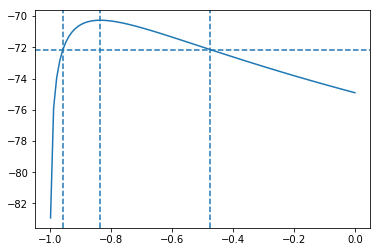

In [8]:
X = sm.add_constant(leafburn.iloc[:,:-1])
n = leafburn.shape[0]
alpha = np.linspace(-0.999,0,100)
llk = np.empty(100)
for i in range(0, 100):
    lmod = sm.OLS(np.log(leafburn.burntime+alpha[i]),X).fit()
    llk[i] = -(n/2)*np.log(lmod.ssr) - np.sum(np.log(leafburn.burntime + alpha[i]))
plt.plot(alpha,llk)
maxi = llk.argmax()
plt.axvline(alpha[maxi],linestyle = 'dashed')
cicut = max(llk) - sp.stats.chi2.ppf(0.95,1)/2
plt.axhline(cicut,linestyle = 'dashed')
ralp = alpha[llk > cicut]
plt.axvline(ralp[0],linestyle = 'dashed')
plt.axvline(ralp[-1],linestyle = 'dashed')
plt.show()


# Broken stick regression

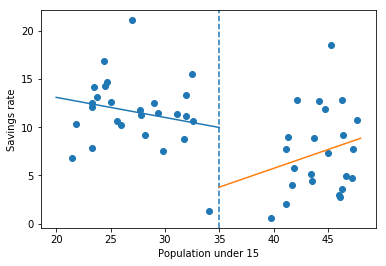

In [9]:
lmod1 = smf.ols(formula='sr ~ pop15', data=savings[savings.pop15 < 35]).fit()
lmod2 = smf.ols(formula='sr ~ pop15', data=savings[savings.pop15 > 35]).fit()
plt.scatter(savings.pop15, savings.sr)
plt.xlabel('Population under 15')
plt.ylabel('Savings rate')
plt.axvline(35,linestyle='dashed')
plt.plot([20,35],[lmod1.params[0]+lmod1.params[1]*20,lmod1.params[0]+lmod1.params[1]*35])
plt.plot([35,48],[lmod2.params[0]+lmod2.params[1]*35,lmod2.params[0]+lmod2.params[1]*48])

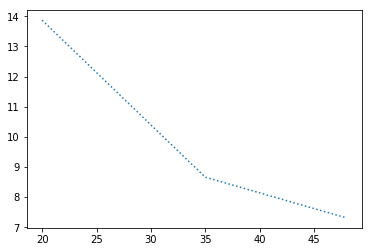

In [10]:
def lhs (x,c): return(np.where(x < c, c-x, 0))
def rhs (x,c): return(np.where(x < c, 0, x-c))
lmod = smf.ols(formula='sr ~ lhs(pop15,35) + rhs(pop15,35)', data=savings).fit()
x = np.arange(20,49)
py = lmod.params[0] + lmod.params[1]*lhs(x,35) + lmod.params[2]*rhs(x,35)
plt.plot(x,py,linestyle='dotted')
plt.show()

# Polynomials

In [11]:
smf.ols(formula='sr ~ ddpi', data=savings).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.916
Date:                Wed, 26 Sep 2018   Prob (F-statistic):             0.0314
Time:                        10:35:38   Log-Likelihood:                -142.99
No. Observations:                  50   AIC:                             290.0
Df Residuals:                      48   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8830      1.011      7.797      0.000       5.850       9.916
ddpi           0.4758      0.215      2.217      0.031       0.044       0.907
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.097
Skew:                          -0.151   Prob(JB):                        0.578
Kurtosis:                       2.340   Cond. No.                         8.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
smf.ols(formula='sr ~ ddpi + I(ddpi**2)', data=savings).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     6.059
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00456
Time:                        10:35:38   Log-Likelihood:                -139.69
No. Observations:                  50   AIC:                             285.4
Df Residuals:                      47   BIC:                             291.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.1304      1.435      3.576      0.001       2.244       8.017
ddpi             1.7575      0.538      3.268      0.002       0.676       2.839
I(ddpi ** 2)    -0.0930      0.036     -2.574      0.013      -0.166      -0.020
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.271
Skew:                          -0.269   Prob(JB):                        0.530
Kurtosis:                       2.434   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
smf.ols(formula='sr ~ ddpi + I(ddpi**2) + I(ddpi**3)', data=savings).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.953
Date:                Wed, 26 Sep 2018   Prob (F-statistic):             0.0137
Time:                        10:35:38   Log-Likelihood:                -139.69
No. Observations:                  50   AIC:                             287.4
Df Residuals:                      46   BIC:                             295.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.1454      2.199      2.340      0.024       0.720       9.571
ddpi             1.7460      1.380      1.265      0.212      -1.033       4.525
I(ddpi ** 2)    -0.0910      0.226     -0.403      0.689      -0.545       0.363
I(ddpi ** 3) -8.497e-05      0.009     -0.009      0.993      -0.019       0.019
==============================================================================
Omnibus:                        1.328   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.277
Skew:                          -0.270   Prob(JB):                        0.528
Kurtosis:                       2.433   Cond. No.                     3.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
savings['mddpi'] = savings.ddpi - 10
smf.ols(formula='sr ~ mddpi + I(mddpi**2)', data=savings).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     6.059
Date:                Wed, 26 Sep 2018   Prob (F-statistic):            0.00456
Time:                        10:35:38   Log-Likelihood:                -139.69
No. Observations:                  50   AIC:                             285.4
Df Residuals:                      47   BIC:                             291.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.4070      1.424      9.415      0.000      10.542      16.272
mddpi            -0.1022      0.303     -0.338      0.737      -0.711       0.507
I(mddpi ** 2)    -0.0930      0.036     -2.574      0.013      -0.166      -0.020
==============================================================================
Omnibus:                        1.319   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.271
Skew:                          -0.269   Prob(JB):                        0.530
Kurtosis:                       2.434   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unfortunately, the following is not orthogonal. Seems to require add on functions.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
Xp = poly.fit_transform(savings.ddpi.values.reshape(-1,1))
sm.OLS(savings.sr,Xp).fit().summary()

/anaconda/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.141
Date:                Wed, 26 Sep 2018   Prob (F-statistic):             0.0232
Time:                        10:35:38   Log-Likelihood:                -139.27
No. Observations:                  50   AIC:                             288.5
Df Residuals:                      45   BIC:                             298.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9266      3.002      2.307      0.026       0.879      12.974
x1            -0.5322      2.952     -0.180      0.858      -6.478       5.413
x2             0.6762      0.907      0.746      0.460      -1.150       2.502
x3            -0.0869      0.100     -0.871      0.389      -0.288       0.114
x4             0.0029      0.003      0.874      0.387      -0.004       0.010
==============================================================================
Omnibus:                        1.187   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.218
Skew:                          -0.298   Prob(JB):                        0.544
Kurtosis:                       2.520   Cond. No.                     8.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that this does not match the R results (R is incorrect because of the orthogonal polynomial handling)

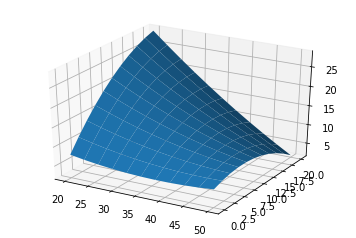

In [16]:
poly = PolynomialFeatures(2)
X = savings.iloc[:,[1,4]]
Xp = poly.fit_transform(X)
lmod = sm.OLS(savings.sr,Xp).fit()
pop15r = np.array(list(np.arange(20,51,3))*11)
ddpir = np.repeat(np.arange(0,21,2),11)
X = np.stack((pop15r, ddpir),axis=1)
Xp = poly.fit_transform(X)
pv = np.dot(Xp,lmod.params)
Xm = np.reshape(pop15r,(11,11))
Ym = np.reshape(ddpir,(11,11))
Zm = np.reshape(pv,(11,11))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xm,Ym,Zm)
plt.show()

# Splines

Generate the example data

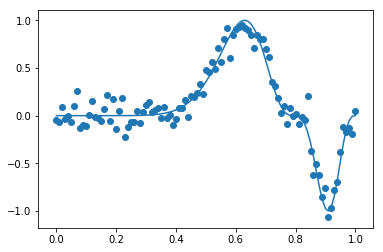

In [17]:
def funky (x): return(np.sin(2*np.pi*x**3)**3)
x = np.linspace(0., 1., 101)
y = funky(x) + sp.stats.norm.rvs(0,0.1,101)
plt.scatter(x,y)
plt.plot(x, funky(x))
plt.show()

4th order polynomial fit

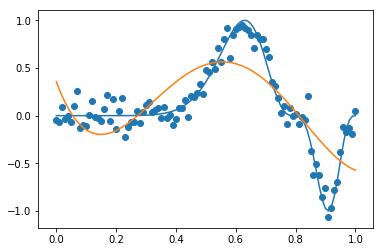

In [18]:
p = np.poly1d(np.polyfit(x,y,4))
plt.scatter(x,y)
plt.plot(x, funky(x))
plt.plot(x,p(x))
plt.show()

12th order polynomial fit

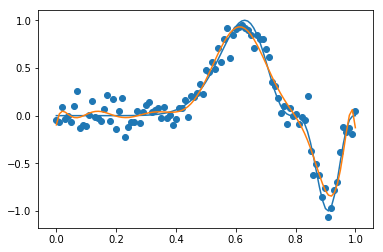

In [19]:
p = np.poly1d(np.polyfit(x,y,12))
plt.scatter(x,y)
plt.plot(x, funky(x))
plt.plot(x,p(x))
plt.show()

Regression splines (choice of knots cheats by putting more knots near the point of inflexion)

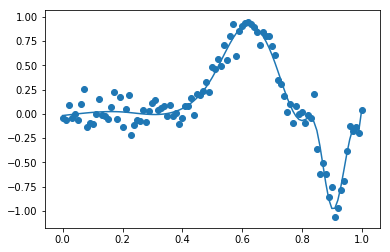

In [20]:
import patsy 
df = pd.DataFrame(x,y)
knots = [0,0.2,0.4,0.5,0.6,0.7,0.8,0.85,0.9,1]
z = smf.ols(formula='y ~ 1 + patsy.bs(x,knots=knots)',data=df).fit()
plt.scatter(x,y)
plt.plot(x, z.fittedvalues)
plt.show()


Smoothing splines as in R apparently not available in Python without specialized libraries

# Additive Models

GAM is apparently not available in Python but we can implement a poor man's version:

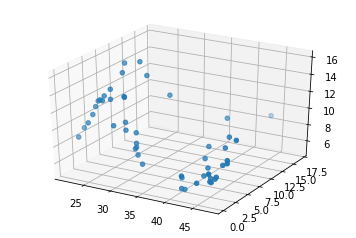

In [21]:
import patsy
gamod = smf.ols(formula = 'sr ~ patsy.bs(pop15,4) + patsy.bs(ddpi,4)', data=savings).fit()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(savings.pop15,savings.ddpi,gamod.fittedvalues)
plt.show()

In [22]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
